# Fake News Detection 

**Problem statement**

Develop an algorithm or model that can automatically identify and flag news articles, posts or videos as either authentic or fake. The objective is to create a reliable and efficient system that can help individuals and organizations to distinguish between real and fake news and promote the dissemination of accurate information.

With the rise of social media and the increasing availability of online news sources, the spread of fake news has become a growing concern. The dissemination of false or misleading information can have serious consequences, such as influencing public opinion, damaging reputations, and even affecting election outcomes.

The main challenges in building a fake news detection model include dealing with the large amount of unstructured data, addressing the issue of bias, and identifying the subtle differences between genuine and fake news.

**Dateset**

The dataset contains a collection of articles from various news sources. The dataset consists of two main parts: a training set and a test set.

The training set contains 20,800 articles, with each article being labeled as either "Real" or "Fake". The articles were collected from various sources, including news websites, blogs, and social media. Reliable news is labelled as 0 and unreliable is labelled as 1.

The test set contains 5,200 articles, which are unlabelled and used for testing the models' performance.

The dataset is collected from kaggale.

Link to the dataset : https://www.kaggle.com/competitions/fake-news/data

**Model selection**

**Word2Vec**

Word2vec is a neural network-based algorithm used to learn vector representations of words in a high-dimensional space. It captures semantic and syntactic similarities between words, so that similar words are mapped to nearby points in the vector space. The algorithm uses a skip-gram or CBOW model to learn word embeddings, which represent words as dense, low-dimensional vectors. Word2vec has various applications in natural language processing such as text classification, machine translation, and sentiment analysis. It is widely used to improve the accuracy of speech recognition systems and to train language models for generating text.

Word2Vec is ideal for fake news detection because it can capture the semantic and syntactic similarities between words, and can represent words as dense, low-dimensional vectors. This makes it possible to identify patterns and relationships between words in text data. By training a Word2Vec model on a large corpus of both real and fake news articles, the model can learn to distinguish between the language used in authentic news articles and the language used in fake news articles.

For example, a Word2Vec model may learn that certain words or phrases commonly appear together in fake news articles but not in real news articles, such as "hoax", "conspiracy", or "unverified sources". By analyzing the word embeddings learned by the model, it may be possible to identify the distinctive features of fake news articles and develop an algorithm or model that can detect them with a high degree of accuracy.

**LSTM**

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) that is commonly used in natural language processing and other sequential data applications. LSTM networks can learn long-term dependencies between input sequences, which is particularly useful for text data. LSTMs are designed to prevent the vanishing gradient problem that can occur in traditional RNNs by using memory cells and gates to control the flow of information through the network. The cells are used to store information for long periods of time, while the gates can selectively allow or block the flow of information based on the input data. This allows LSTMs to effectively model complex relationships and patterns in sequential data.

LSTMs are ideal for fake news detection because they are particularly well-suited for analyzing sequential data such as text. Fake news detection often involves identifying patterns and relationships between words and phrases in news articles, which can be captured by LSTM models.

By training an LSTM model on a large corpus of both real and fake news articles, the model can learn to identify the distinctive features of fake news articles, such as sensationalist language, unverified sources, or conspiracy theories. This can help to develop an algorithm or model that can detect fake news articles with a high degree of accuracy.

**Implementation**

**Word2Vec**

Word2Vec is implemented using the Gensim library.

The 'sentences' parameter takes a list of sentences or a list of lists, where each sentence or list contains a sequence of words. This represents the training data for the model.

The 'vector_size' parameter specifies the dimensionality of the word embeddings that the model will learn. In this case, it is set to 100.

The 'window' parameter specifies the maximum distance between the target word and its surrounding context words in a sentence. The default value is 5, meaning that the model will consider the five words to the left and the five words to the right of the target word as context words.

The 'min_count' parameter specifies the minimum frequency of a word in the training data for it to be included in the vocabulary. In this case, it is set to 1, meaning that all words will be included in the vocabulary.

The Word2Vec function then trains the Word2Vec model on the training data, using the parameters specified. After training, the model can be used to generate word embeddings for any word in the vocabulary.

**LSTM**

Embedding Layer : The weights parameter sets the weights of the embedding layer to the pre-trained word embeddings that are passed in as embedding_vectors. The input_length parameter specifies the length of the input sequences, which is set to maxlen. The trainable parameter is set to False to keep the pre-trained weights fixed during training.

LSTM Layers : Two LSTM layers with 128 memory units in each layer. The return_sequences parameter of the first LSTM layer is set to True to return the output sequences of each time step, which will be used as input to the second LSTM layer.

Two LSTM layers are used instead of one to enable the model to learn more complex relationships between words in the text. The first LSTM layer is set to return sequences (return_sequences=True), which means that it will output the hidden state at each time step in the input sequence, rather than just the final hidden state. This output is then used as input to the second LSTM layer. By doing this, the second LSTM layer is able to build on the patterns learned by the first LSTM layer and capture more complex dependencies in the data. In effect, this creates a deeper network architecture, which has been shown to be effective in capturing complex patterns in sequential data. By adding more layers, the model can learn increasingly abstract and complex representations of the input data, which can improve its performance on the task of fake news detection.

Dropout Layer : A Dropout layer is added to the model with a rate of 0.1 to prevent overfitting.

Dense Layers : Two Dense layers with 32 and 1 units respectively. The relu activation function is used for the first Dense layer, and the sigmoid activation function is used for the output Dense layer.

Two dense layers are used instead of one to add more non-linearity and complexity to the model. The first dense layer with 32 units and the relu activation function is used to introduce non-linearity to the model and create a more complex representation of the data. The relu activation function helps to address the vanishing gradient problem that can occur in deep neural networks, by allowing the model to maintain gradients throughout the network during backpropagation. The second dense layer with 1 unit and the sigmoid activation function is used as the output layer to produce a binary classification output, where a value closer to 0 represents a prediction of fake news and a value closer to 1 represents a prediction of real news. By using two dense layers, the model can learn more complex patterns in the data and increase its predictive accuracy. Adding more dense layers can lead to overfitting, so the number of layers should be chosen carefully based on the size of the dataset and the complexity of the task at hand. In this case, two dense layers seem to be sufficient to achieve good performance in fake news detection.

Optimizer : The optimizer parameter is set to 'adam', which is a popular stochastic gradient descent algorithm that uses adaptive learning rates and momentum to update network weights during training. Adam is a good choice for this task because it has been shown to converge quickly and perform well on a wide range of problems.

The loss parameter is set to 'binary_crossentropy', which is a loss function used for binary classification tasks. Binary cross-entropy measures the difference between the predicted probability distribution and the actual probability distribution. It is a popular choice for binary classification tasks and can penalize heavily for incorrect predictions.

The metrics parameter is set to ['acc'], which specifies that the model should be evaluated based on its classification accuracy. The classification accuracy is the proportion of correct predictions made by the model over all predictions made. It is a common evaluation metric for classification tasks, but it can be misleading in cases where the classes are imbalanced.

Finally, the embedding_vectors object is deleted to free up memory.

In [39]:
#Importing necessary libraries
import numpy as np 
import pandas as pd 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
from gensim.models import Word2Vec
from sklearn.metrics import precision_recall_fscore_support

In [61]:
#Reading the train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_subm = pd.read_csv('submit.csv')

In [3]:
#Dropping the 'id' and 'author' columns from the datasets
train = train.drop(columns=['id', 'author']).fillna('')
test = test.drop(columns=['id', 'author']).fillna('')

In [4]:
train.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
#Concatenating the title and text columns in the train and test datasets and dropping the title column
try:
    train.text = train.title + train.text
    test.text = test.title + train.text
    train.drop(columns=['title'], inplace=True)
    test.drop(columns=['title'], inplace=True)
except Exception as exc:
    print("Columns are already dropped")
train.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You FiredWhy the Truth...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [6]:
#Downloading the stopwords corpus from NLTK library.
nltk.download('stopwords')
port_stem = PorterStemmer()

#Defining a function to take text column of train and test datasets and perform stemming on them
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content) #Remove any character that is not a letter
    review = review.lower() #Convert all letters to lower case
    review = review.split() #Split the string into a list of words
    review = list(map(port_stem.stem, review)) #Perform stemming on the list of words and replce them with the stemmed form
    review = ' '.join(review) #Join the list of words to form a string with a space sepearating them 
    return review

#Apply stemming on train and test datasets
train.text = train.text.apply(stemming)
test.text = test.text.apply(stemming)
train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
0,hous dem aid we didn t even see comey s letter...,1
1,flynn hillari clinton big woman on campu breit...,0
2,whi the truth might get you firedwhi the truth...,1
3,civilian kill in singl us airstrik have been i...,1
4,iranian woman jail for fiction unpublish stori...,1


In [7]:
#Converting the text column into a list of list of words
train_list = train.text.str.split().to_list()

In [8]:
EMBEDDING_DIM = 100

#Word2Vec model
w2v_model = Word2Vec(sentences=train_list, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [9]:
#Retrieving the number of unique words in the vocabulary of the trained Word2Vec model
len(w2v_model.wv.key_to_index)

119419

In [10]:
#Word embedding for the word 'the' from the trained Word2Vec model
w2v_model.wv['the']

array([-0.623296  , -0.83466387, -0.12156601, -0.23185374, -0.42181826,
        2.0699506 ,  0.89775187, -1.996735  , -0.8293047 ,  0.294101  ,
       -1.3964146 ,  1.1978039 , -0.12341012,  0.05626316, -1.778223  ,
        0.7359561 ,  2.7637327 ,  1.3669524 , -0.31847164, -0.55723983,
       -1.101916  ,  2.1038804 , -1.1917374 , -0.81996614,  3.0275886 ,
       -0.2655436 ,  0.7773566 ,  3.449984  , -1.8099395 ,  0.78424877,
       -0.9013094 , -0.31634843, -1.5765237 ,  2.023271  ,  0.27161592,
       -0.9198184 , -0.9164019 , -1.4209591 ,  0.12307112,  2.3140762 ,
       -0.05010661,  1.959554  , -0.8199238 , -0.48460627,  0.3253545 ,
        0.5535828 , -0.33303997,  0.2639708 ,  0.14924069, -2.496065  ,
        1.1886649 ,  1.7281913 , -0.26699072,  2.0940893 ,  1.2678763 ,
        1.5585569 , -0.82599396,  0.01609567,  1.3472779 , -1.0569754 ,
       -0.577044  ,  0.36130297, -1.0441552 ,  1.0372669 ,  2.0561182 ,
       -1.5964408 , -0.16226207, -2.6168416 ,  1.4923007 ,  1.83

In [11]:
#Shape of the matrix containing the word embeddings in the Word2Vec model
w2v_model.wv.vectors.shape

(119419, 100)

**Tokenizer**

In natural language processing, tokenization is the process of breaking up a text into smaller units called tokens, which are typically words, phrases, or other meaningful units of text. Tokenization is an important preprocessing step in many NLP tasks, including language modeling, machine translation, and sentiment analysis.

The Keras 'Tokenizer' class is a utility for tokenizing and encoding text data, which makes it easy to prepare text data for use in neural network models. The 'Tokenizer' class takes a text corpus as input and generates a dictionary that maps each unique word in the corpus to an integer index. This dictionary can then be used to convert the text data to sequences of integers, where each word is replaced with its corresponding integer index.

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_list)

X = tokenizer.texts_to_sequences(train_list)

In [13]:
maxlen = 700 

#Padding the sequences to a maximum length of 700
X = pad_sequences(X, maxlen=maxlen)

In [14]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

119420

In [48]:
#Defining a function that takes the Word2Vec model and vocabulary dictionary and returns a weight matrix that can be used for initializing the weights of an embedding layer in a neural network.
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 1 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # for each word in vocabulary, corresponding word vector is retrieved from Word2Vec model
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [67]:
word_index = tokenizer.word_index
#Call the function to get weight matrix
embedding_vectors = get_weight_matrix(w2v_model, word_index)
embedding_vectors.shape

(119420, 100)

In [68]:
model = Sequential()

# set embedding vectors as weights in Embedding layer 
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))

model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# delete embedding vectors object to free memory
del embedding_vectors

In [69]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 700, 100)          11942000  
                                                                 
 lstm_10 (LSTM)              (None, 700, 128)          117248    
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,194,993
Trainable params: 252,993
Non

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, train.label.values)

In [72]:
history = model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
488/488 [==============================] - 479s 982ms/step - loss: 0.2652 - acc: 0.8951 - val_loss: 0.2105 - val_acc: 0.9192
Epoch 2/7
488/488 [==============================] - 514s 1s/step - loss: 0.1819 - acc: 0.9294 - val_loss: 0.1635 - val_acc: 0.9340
Epoch 3/7
488/488 [==============================] - 1697s 3s/step - loss: 0.1497 - acc: 0.9419 - val_loss: 0.1520 - val_acc: 0.9413
Epoch 4/7
 60/488 [==>...........................] - ETA: 8:10 - loss: 0.0907 - acc: 0.9651

KeyboardInterrupt: 

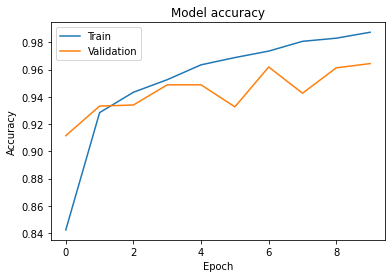

In [54]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [58]:
test_seqs = tokenizer.texts_to_sequences(test.text.str.split().to_list())
test_seqs = pad_sequences(test_seqs, maxlen=maxlen)
preds = model.predict(test_seqs)

163/163 [==============================] - 40s 242ms/step


In [62]:
sample_subm.label = (preds > 0.5).astype(int)
sample_subm.label

0       1
1       0
2       1
3       1
4       1
       ..
5195    1
5196    0
5197    1
5198    1
5199    0
Name: label, Length: 5200, dtype: int32

In [64]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, sample_subm.label, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Precision: 0.4992720796024444
Recall: 0.4994230769230769
F1-Score: 0.4993223071220693


In [65]:
sample_subm.to_csv('subm.csv', index=False)
sample_subm.head()

,id,label
0,20800,1
1,20801,0
2,20802,1
3,20803,1
4,20804,1
